In [38]:
#Importing the Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [39]:
#loading the data
df = pd.read_csv("C:/Users/Mega Store/Desktop/IRIS.csv")

# EDA

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [44]:
#Data Cleanning
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [45]:
df.drop_duplicates(inplace=True)

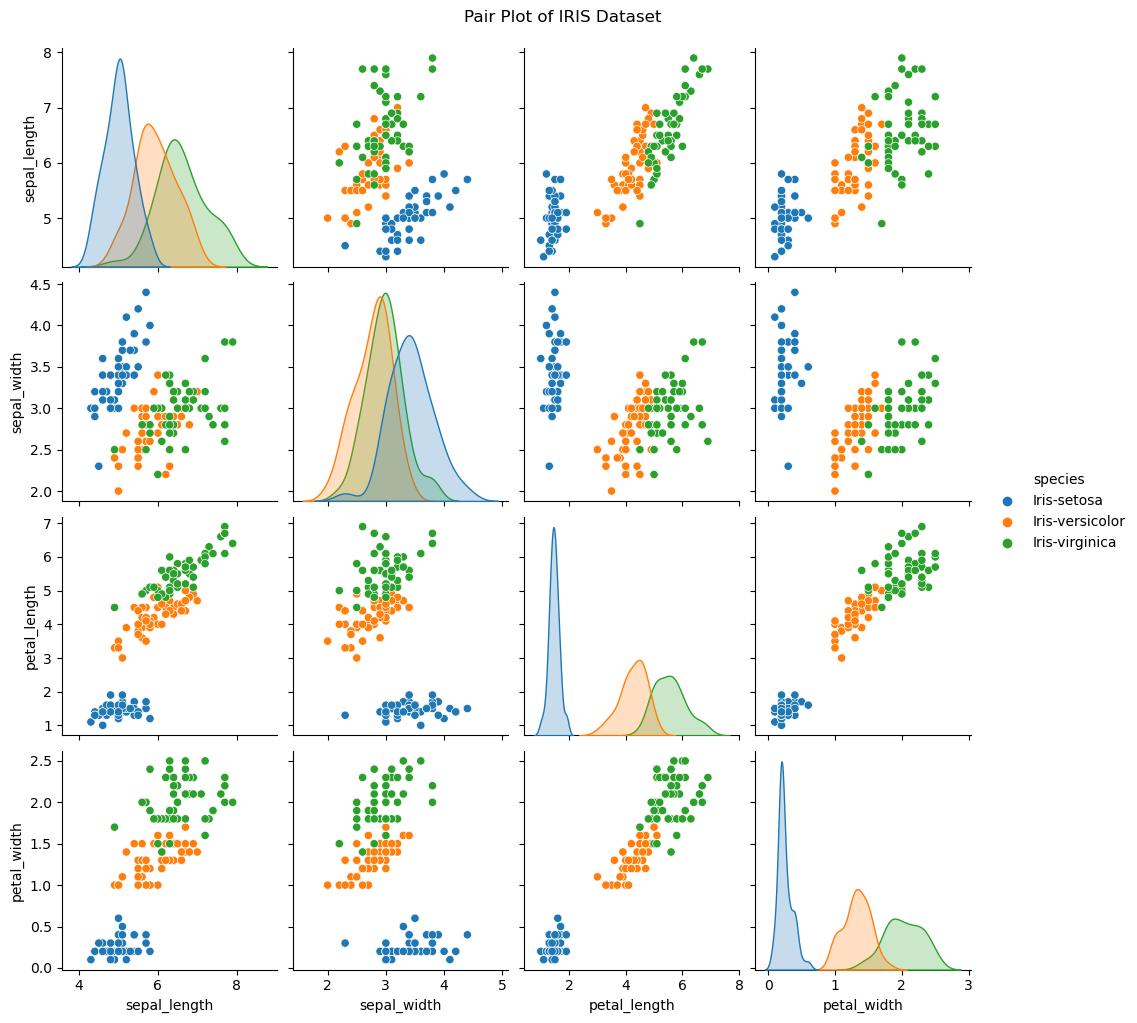

In [46]:
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of IRIS Dataset', y=1.02)
plt.show()

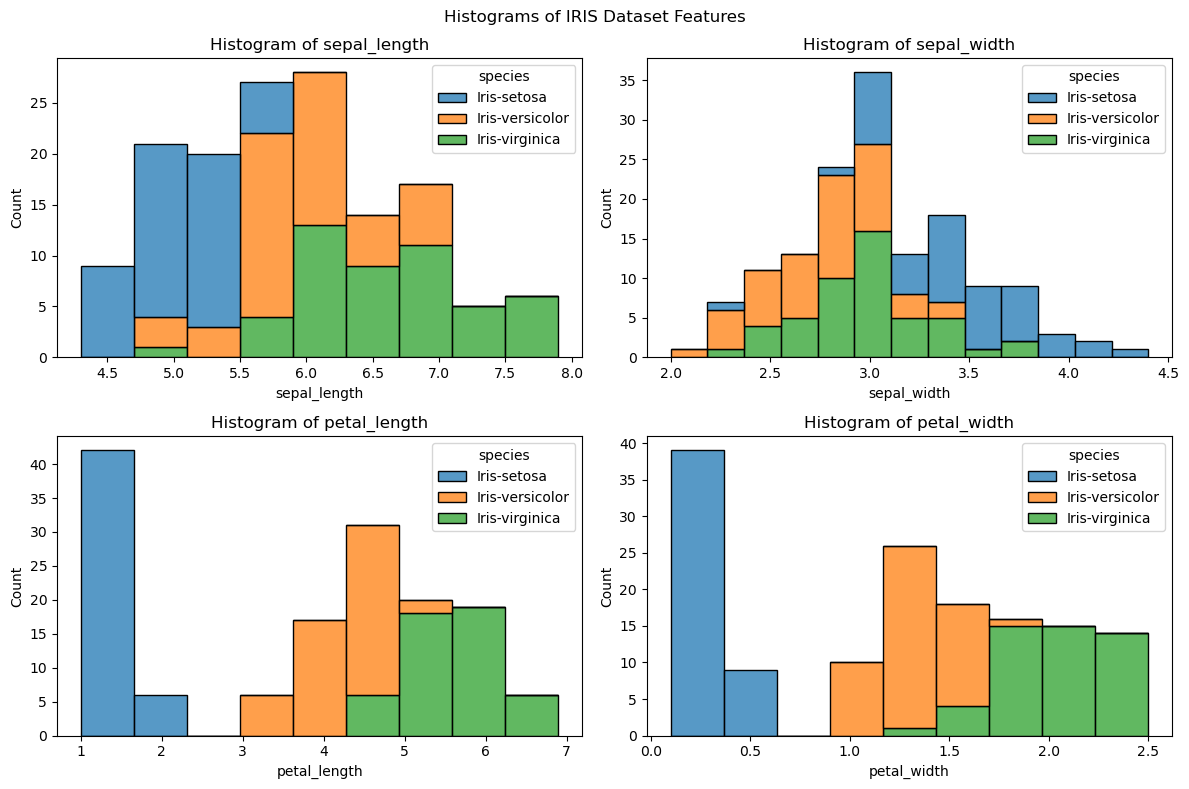

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histograms of IRIS Dataset Features')

features = df.columns
for i, ax in enumerate(axs.flat):
    sns.histplot(data=df, x=features[i], hue='species', multiple='stack', ax=ax)
    ax.set_title(f'Histogram of {features[i]}')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


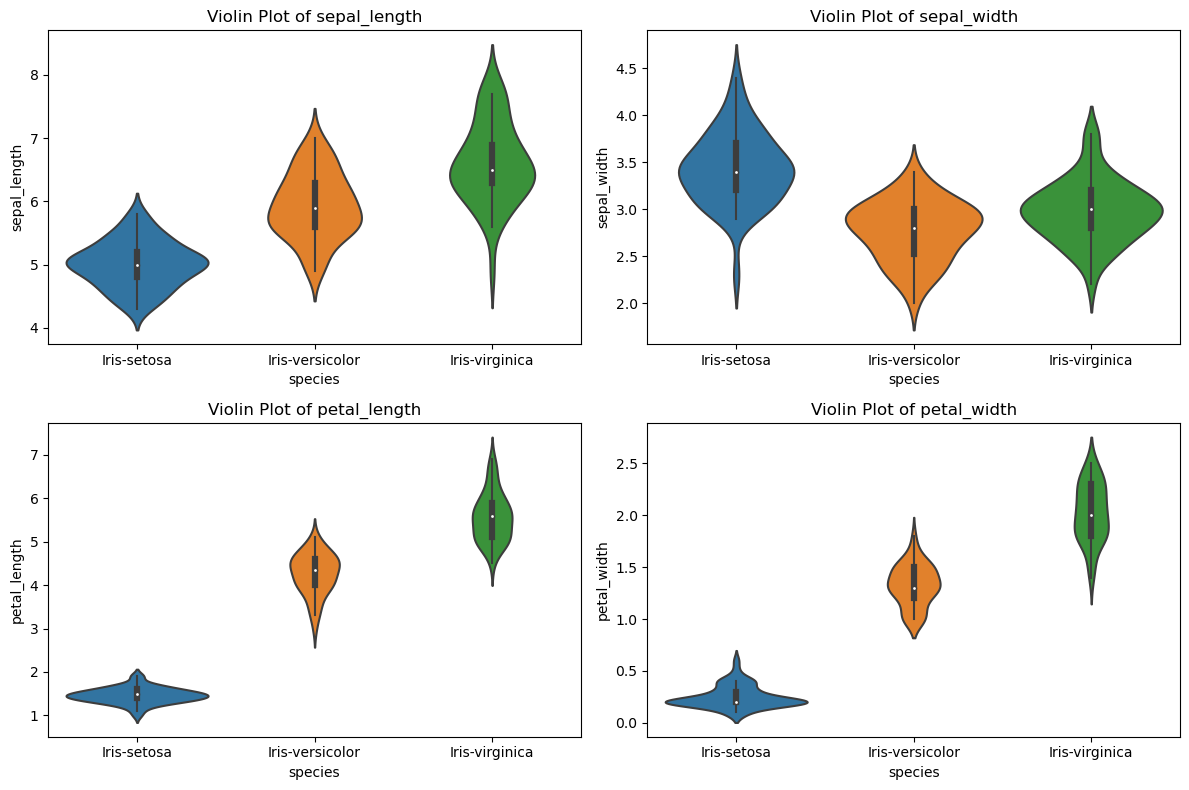

In [48]:
# Violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(2, 2, i+1)  # Ensure we have exactly four subplots (2 rows x 2 columns)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


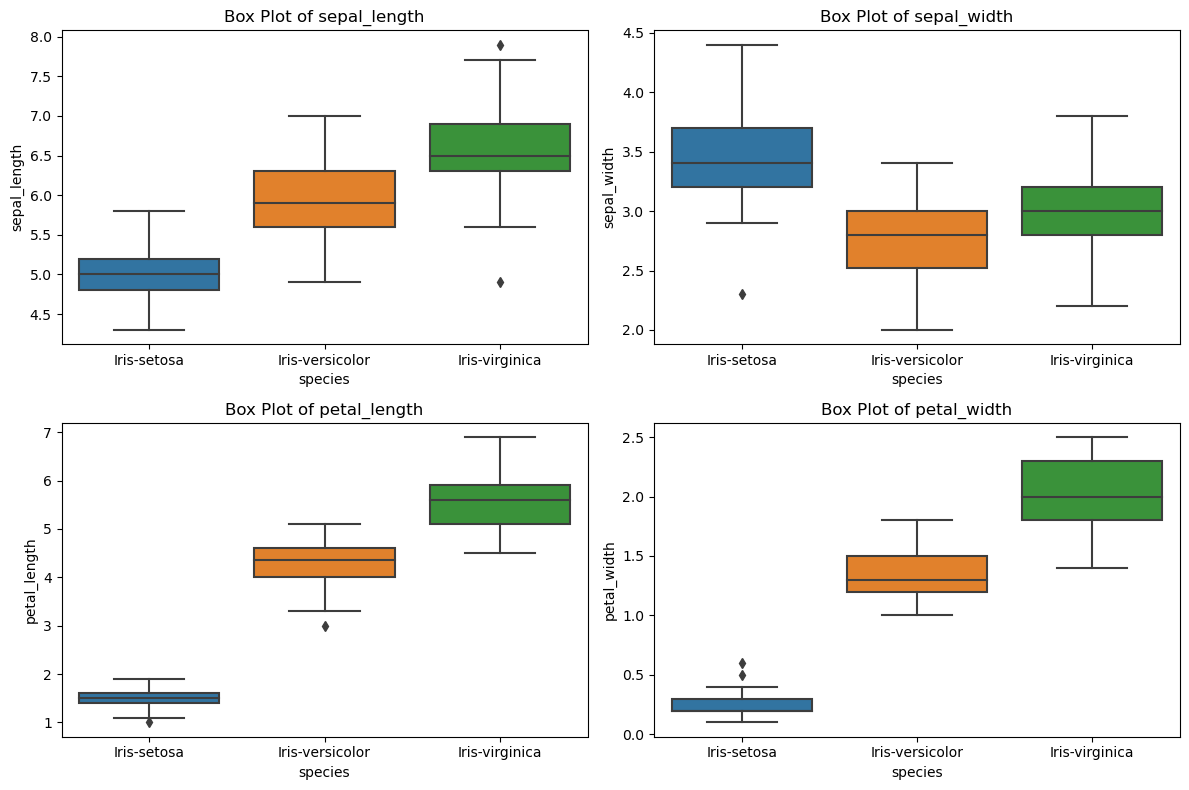

In [49]:
#Box Plots 
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):  
    plt.subplot(2, 2, i+1)  
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


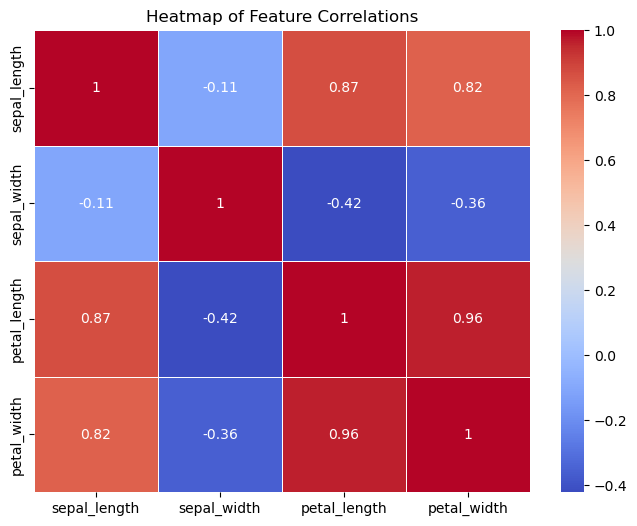

In [50]:
# Calculate correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()  # Exclude the 'species' column

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


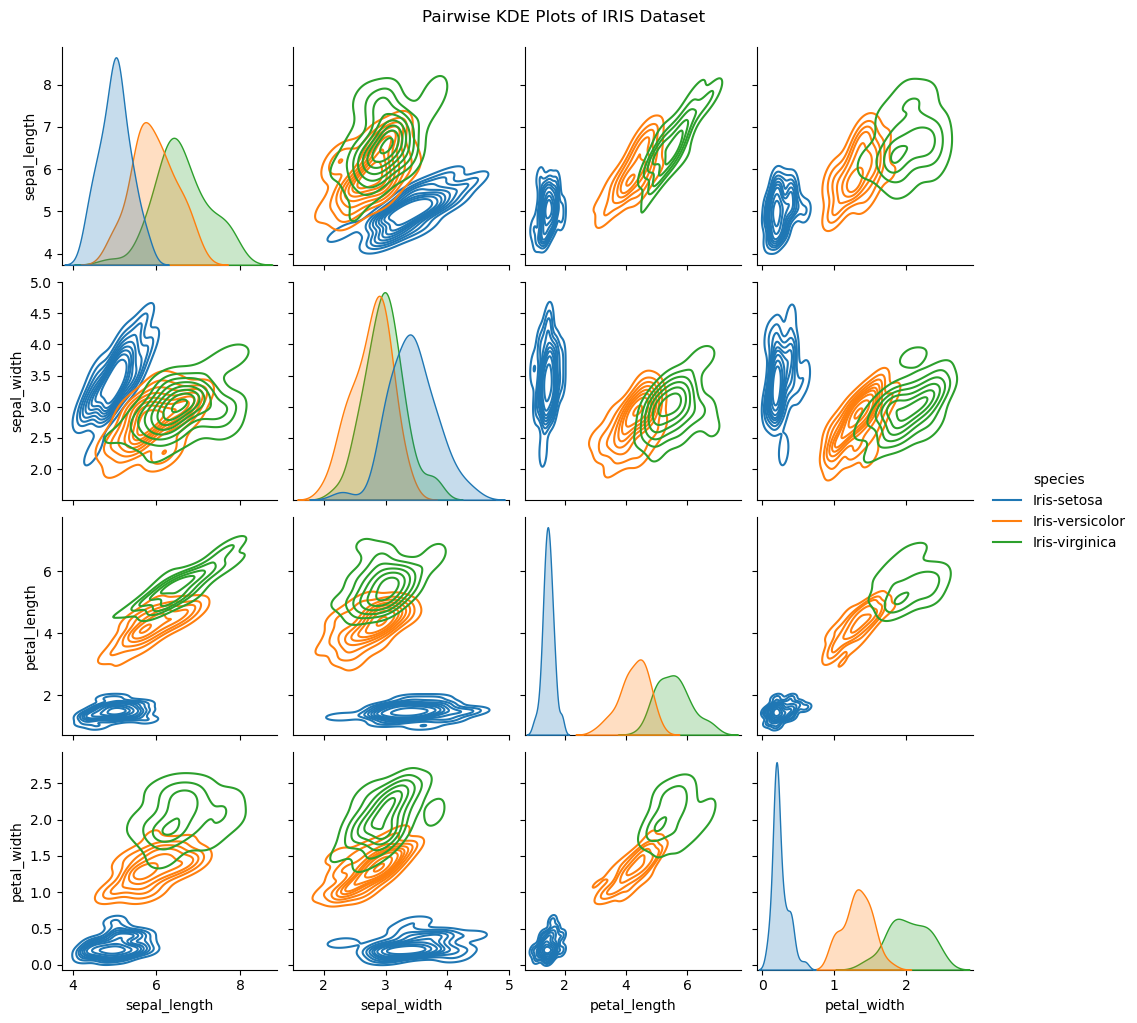

In [51]:
#KDE
sns.pairplot(df, hue='species', kind='kde')
plt.suptitle('Pairwise KDE Plots of IRIS Dataset', y=1.02)
plt.show()


# Data Preprocessing

In [52]:
X = df.drop('species', axis=1)
y = df['species']

In [53]:
#Encoding the data
y = pd.Categorical(y).codes

In [54]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:
#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = rf.predict(X_test)


# Evaluating

In [59]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')



Accuracy: 0.9555555555555556


In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


In [61]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



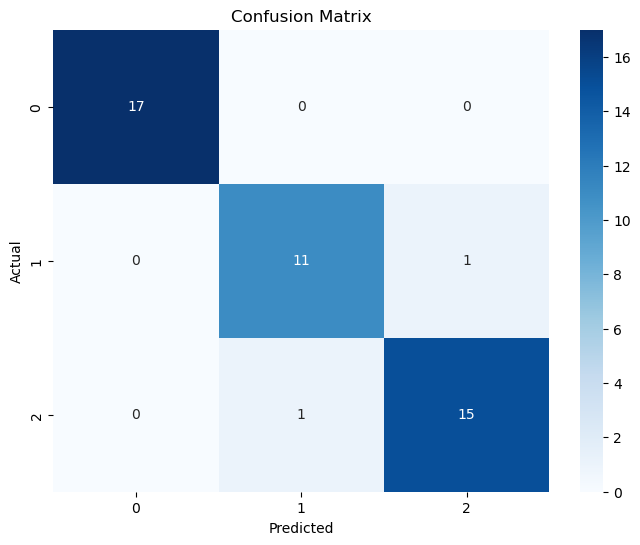

In [62]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()